# WORLD HAPPINESS EXPLANATORY DATA ANALYSIS

## What will you learn from this project?
* Bivariate data analysis
* Multivariate data analysis
* Seaborn library visualization techniques: bar, box,kde,swarm,heatmap,clustermap
* Plotly libray visualization techniques: animated plot and world map

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import plotly.express as px
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/countries-population-from-1955-to-2020/PopulationByCountryHistory.csv
/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv
/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv


In [2]:
data= pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv",encoding="latin1")

In [3]:
data2024 = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv")

In [4]:
df = data.copy()

In [5]:
df2024 = data2024.copy()

In [6]:
def check_df(data_frame):
    print("######## INFO ########")
    data_frame.info()
    print("######## IS NULL ########")
    print(data_frame.isna().sum())
    print("######## DESCRIBE ########")
    print(data_frame.describe())
    print("######## SHAPE ########")
    print(data_frame.shape)     

In [52]:
check_df(df)

######## SHAPE ########
(2363, 12)
######## INFO ########
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
 11  region     

In [8]:
check_df(df2024)

######## INFO ########
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 1

In [9]:
df2024.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

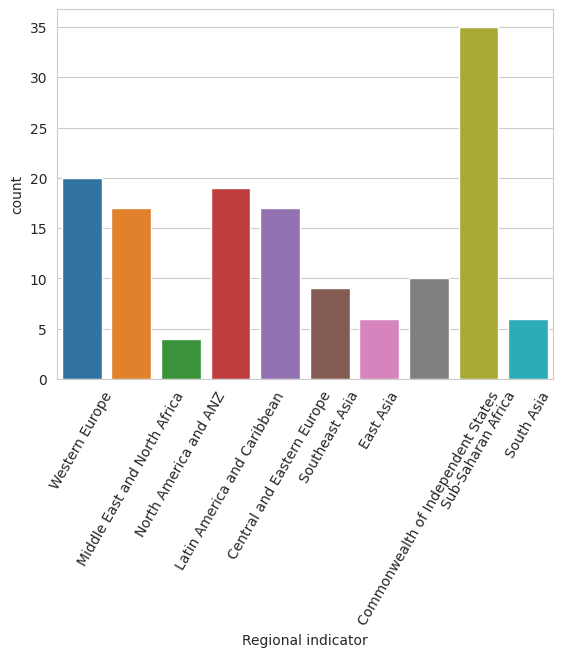

In [10]:
sns.countplot(x="Regional indicator", data=df2024)
plt.xticks(rotation=60)
plt.show()

In [11]:
list_features = ["Social support","Freedom to make life choices","Generosity","Perceptions of corruption"]

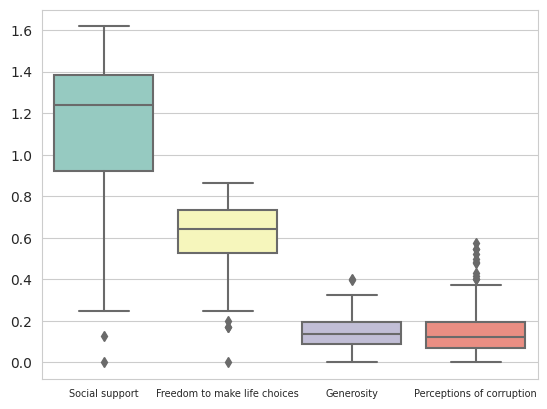

In [12]:
sns.boxplot(data=df2024.loc[:,list_features],orient="v",palette="Set3")
plt.xticks(size=7)
plt.show()

In [13]:
list_features2=["Ladder score","Log GDP per capita"]

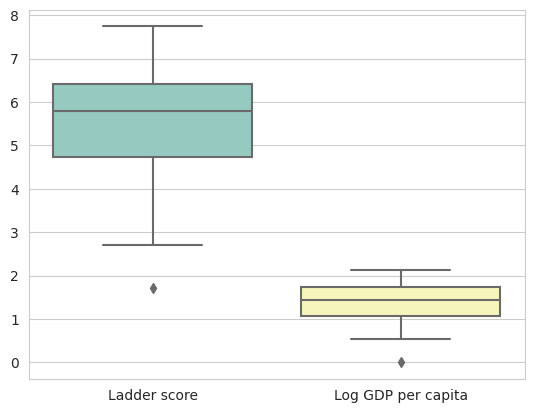

In [14]:
sns.boxplot(data = df2024.loc[:,list_features2],orient="v",palette="Set3")
plt.show()

In [15]:
list_features3 =["Healthy life expectancy"]

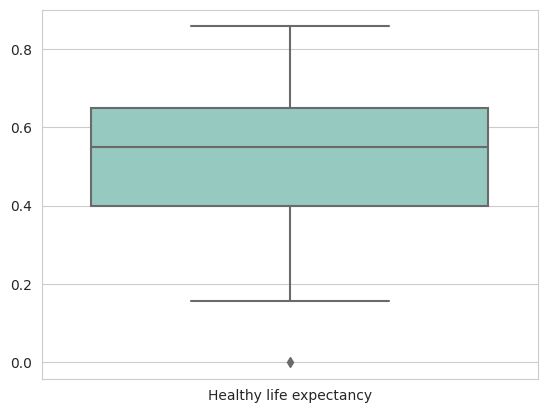

In [16]:
sns.boxplot(data = df2024.loc[:,list_features3],orient="v",palette="Set3")
plt.show()

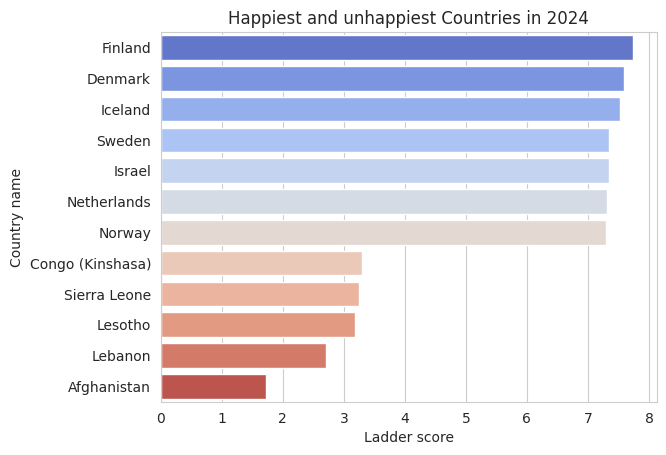

In [17]:
df2024_happiest= df2024[(df2024.loc[:,"Ladder score"]>7.3) | (df2024.loc[:,"Ladder score"]<3.3)]
sns.barplot(x="Ladder score",y="Country name",data=df2024_happiest,palette="coolwarm")
plt.title("Happiest and unhappiest Countries in 2024")
plt.show()

In [18]:
df2024.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

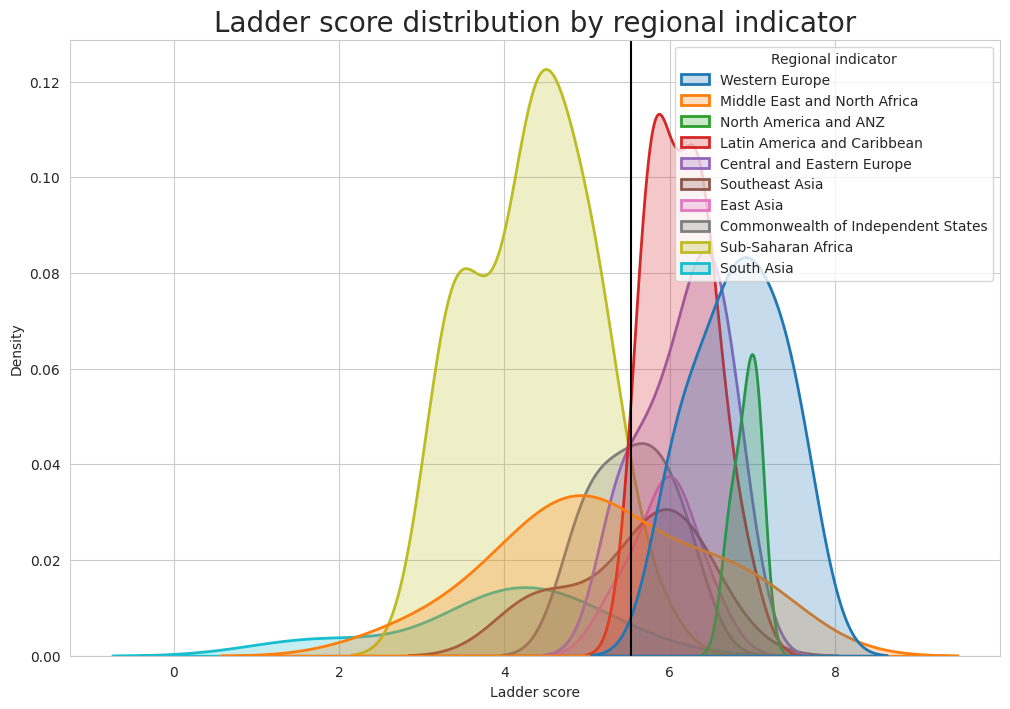

In [19]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df2024, x="Ladder score", hue="Regional indicator",fill=True,linewidth=2)
plt.axvline(df2024["Ladder score"].mean(),c="black")
plt.title("Ladder score distribution by regional indicator",size=20)
plt.show()

In [20]:
fig = px.choropleth(df.sort_values("year"),
                   locations="Country name",
                   color= "Life Ladder",
                   locationmode="country names",
                   animation_frame="year")
fig.update_layout(title="life Ladder Comparison by Countries")
fig.show()

In [ ]:
fig.write_html("life_ladder_corruption.html")

In [21]:
df2024_g = df2024[(df2024.loc[:,"Generosity"]>0.3) | (df2024.loc[:,"Generosity"]<0.02)]

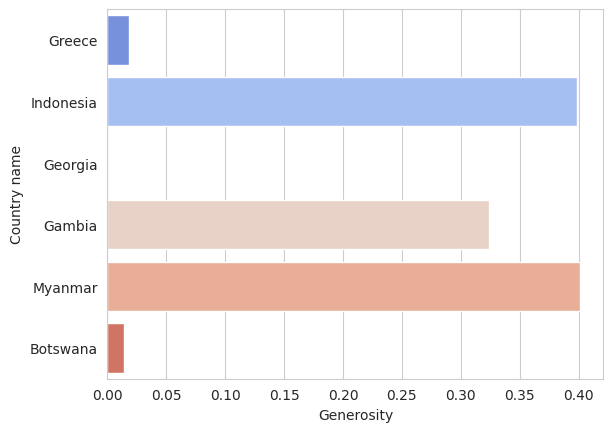

In [22]:
sns.barplot(x="Generosity",y="Country name",data=df2024_g,palette="coolwarm")
plt.show()

In [53]:
fig2 = px.choropleth(df.sort_values("year"),
                   locations="Country name",
                   color= "Generosity",
                   locationmode="country names",
                   animation_frame="year")
fig2.update_layout(title="Generosity Comparison by Countries")
fig2.show()

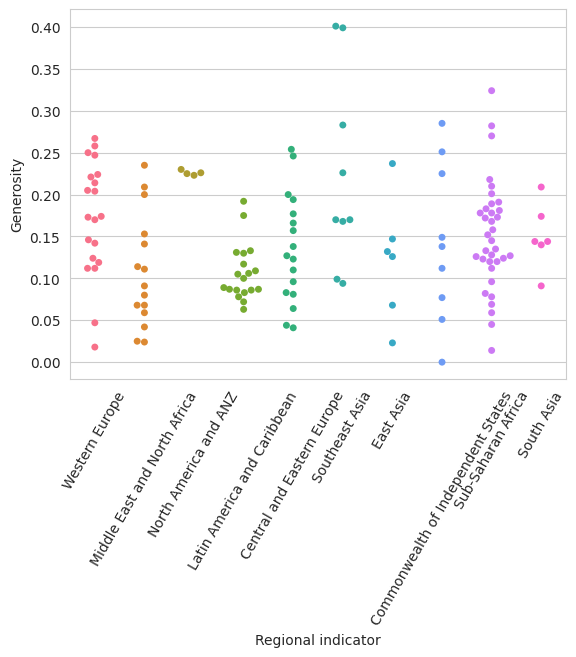

In [24]:
sns.swarmplot(x="Regional indicator",y="Generosity",data=df2024, palette="husl")
plt.xticks(rotation=60)
plt.show()

In [25]:
pop = pd.read_csv("/kaggle/input/countries-population-from-1955-to-2020/PopulationByCountryHistory.csv")

In [26]:
pop.columns

Index(['Year', 'Country', 'Population', 'Yearly % Change', 'Yearly Change',
       'Migrants (net)', 'Median Age', 'Fertility Rate', 'Density (P/Km²)',
       'Urban Pop %', 'Urban Population', 'Country's Share of World Pop %',
       'World Population', 'Country Global Rank'],
      dtype='object')

In [27]:
popu = pop.drop(columns=['Yearly % Change', 'Yearly Change','Migrants (net)', 'Median Age', 'Fertility Rate', 'Density (P/Km²)',
       'Urban Pop %', 'Urban Population', "Country's Share of World Pop %",
       'World Population', 'Country Global Rank'],axis=1)

In [28]:
popu.tail()

,Year,Country,Population
4099,1975,Holy See,740
4100,1970,Holy See,752
4101,1965,Holy See,908
4102,1960,Holy See,918
4103,1955,Holy See,911


In [29]:
country_continent = {}
for i in range(len(df2024)):
    country_continent[df2024["Country name"][i]] = df2024["Regional indicator"][i]
all_countries = df["Country name"].value_counts().reset_index()["Country name"].tolist()
all_countries_2024 = df2024["Country name"].value_counts().reset_index()["Country name"].tolist()

for x in all_countries:
    if x not in all_countries_2024:
        print(x)

Türkiye
Belarus
Rwanda
Haiti
Turkmenistan
Syria
Qatar
Sudan
Trinidad and Tobago
Central African Republic
Burundi
Angola
Djibouti
South Sudan
Somaliland region
Somalia
Bhutan
Belize
Cuba
Suriname
Guyana
Oman
Maldives


In [30]:
region = []
for i in range(len(df)):
    if df['Country name'][i] == 'Türkiye':
        region.append("Central and Eastern Europe")
    elif df['Country name'][i] == 'Belarus':
        region.append("Central and Eastern Europe")
    elif df['Country name'][i] == 'Rwanda':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Haiti':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Turkmenistan':
        region.append("South Asia")
    elif df['Country name'][i] == 'Syria':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Qatar':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Sudan':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Central African Republic':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Trinidad and Tobago':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Burundi':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'South Sudan':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Angola':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Somaliland region':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Somalia':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Belize':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Bhutan':
        region.append("South Asia")
    elif df['Country name'][i] == 'Cuba':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Suriname':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Guyana':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Oman':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Maldives':
        region.append("South Asia")
    elif df['Country name'][i] == 'Djibouti':
        region.append("Sub-Saharan Africa")
    else:
        region.append(country_continent[df['Country name'][i]])
        
df["region"] = region

In [31]:
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,region
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258,South Asia
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237,South Asia
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275,South Asia
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267,South Asia
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268,South Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235,Sub-Saharan Africa
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346,Sub-Saharan Africa
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242,Sub-Saharan Africa
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191,Sub-Saharan Africa


In [32]:
all_countries1 = df["Country name"].value_counts().reset_index()["Country name"].tolist()
all_countries_pop = popu["Country"].value_counts().reset_index()["Country"].tolist()

In [33]:
del_cou = []
for x in all_countries1:
    if x not in all_countries_pop:
        del_cou.append(x)
del_cou

['Türkiye',
 'Kosovo',
 'Taiwan Province of China',
 'Czechia',
 'Congo (Brazzaville)',
 'Hong Kong S.A.R. of China',
 'Ivory Coast',
 'Congo (Kinshasa)',
 'Somaliland region']

In [34]:
pop_df = df[['Log GDP per capita', 'Life Ladder', 'Country name', 'year', 'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',"region",'Perceptions of corruption']].copy()
pop_df.head()

,Log GDP per capita,Life Ladder,Country name,year,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,region,Perceptions of corruption
0,7.350,3.724,Afghanistan,2008,0.451,50.5,0.718,0.164,South Asia,0.882
1,7.509,4.402,Afghanistan,2009,0.552,50.8,0.679,0.187,South Asia,0.850
2,7.614,4.758,Afghanistan,2010,0.539,51.1,0.600,0.118,South Asia,0.707
3,7.581,3.832,Afghanistan,2011,0.521,51.4,0.496,0.160,South Asia,0.731
4,7.661,3.783,Afghanistan,2012,0.521,51.7,0.531,0.234,South Asia,0.776


In [35]:
pop_df["year"].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2021, 2022, 2023, 2007, 2020, 2006, 2005])

In [36]:
pop_df = pop_df[~pop_df["Country name"].isin(del_cou)]
pop_df = pop_df[~pop_df.year.isin([2005,2006,2007,2008,2009,2011,2012,2013,2014,2016,2017,2018,2019,2021])]

In [37]:
popu = popu[popu['Year'].str.isnumeric()]

In [38]:
popu["Year"] = popu["Year"].astype(int)

In [39]:
popu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4097 entries, 0 to 4103
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        4097 non-null   int64 
 1   Country     4097 non-null   object
 2   Population  4097 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 128.0+ KB


In [40]:
popdicts = {x:{} for x in [2010,2015,2020,2022,2023]}
for index, row in popu.iterrows():
    year = row['Year']
    country = row['Country']
    population = row['Population']
    
    if year in [2010, 2015, 2020, 2022, 2023]:
        popdicts[year][country] = population  

In [41]:
Population = []
for i in pop_df.index:
    Population.append(popdicts[pop_df["year"][i]][pop_df["Country name"][i]])
pop_df["Population"] = Population

In [42]:
pop_df

,Log GDP per capita,Life Ladder,Country name,year,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,region,Perceptions of corruption,Population
2,7.614,4.758,Afghanistan,2010,0.539,51.100,0.600,0.118,South Asia,0.707,28189672
7,7.654,3.983,Afghanistan,2015,0.529,52.600,0.389,0.078,South Asia,0.881,33753499
13,NaN,1.281,Afghanistan,2022,0.228,54.875,0.368,NaN,South Asia,0.733,41128771
14,NaN,1.446,Afghanistan,2023,0.368,55.200,0.228,NaN,South Asia,0.738,42239854
17,9.283,5.269,Albania,2010,0.733,67.600,0.569,-0.176,Central and Eastern Europe,0.726,2913399
...,...,...,...,...,...,...,...,...,...,...,...
2349,7.495,4.682,Zimbabwe,2010,0.857,45.200,0.665,-0.081,Sub-Saharan Africa,0.828,12839771
2354,7.747,3.703,Zimbabwe,2015,0.736,51.200,0.667,-0.111,Sub-Saharan Africa,0.810,14154937
2359,7.596,3.160,Zimbabwe,2020,0.717,53.575,0.643,0.003,Sub-Saharan Africa,0.789,15669666
2361,7.670,3.296,Zimbabwe,2022,0.666,54.525,0.652,-0.073,Sub-Saharan Africa,0.753,16320537


In [54]:
filtered_df = pop_df[pop_df['year'].isin([2010, 2015, 2020, 2022, 2023])]
filtered_df['year'] = pd.Categorical(filtered_df['year'], categories=[2010, 2015, 2020, 2022, 2023], ordered=True)
filtered_df = filtered_df.sort_values(by='year')
fig3 = px.scatter(filtered_df, 
                 x = "Log GDP per capita",
                 y = "Life Ladder",
                 animation_frame = "year",
                 animation_group = "Country name",
                 size = "Population",
                 template = "plotly_white",
                 color = "region", 
                 hover_name = "Country name", 
                 size_max = 60)
fig3.update_layout(title = "Life Ladder and Log GDP per capita Comparison by Countries via Regions for each Year")
fig3.show()

In [55]:
fig4 = px.scatter(filtered_df, 
                 x = "Freedom to make life choices",
                 y = "Life Ladder",
                 animation_frame = "year",
                 animation_group = "Country name",
                 size = "Population",
                 template = "plotly_dark",
                 color = "region", 
                 hover_name = "Country name", 
                 size_max = 60)
fig4.update_layout(title = "Life Ladder and Freedom Comparison by Countries via Regions for each Year")
fig4.show()

In [56]:
fig5 = px.scatter(filtered_df, 
                 x = "Perceptions of corruption",
                 y = "Life Ladder",
                 animation_frame = "year",
                 animation_group = "Country name",
                 size = "Population",
                 color = "region", 
                 hover_name = "Country name", 
                 size_max = 60)
fig5.update_layout(title = "Life Ladder and Corruption Comparison by Countries via Regions for each Year")
fig5.show()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
 11  region                            2363 non-null   object 
dtypes: flo

In [47]:
df2 = df.iloc[:,1:11]

In [48]:
df2

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...
2358,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235
2359,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346
2360,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242
2361,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191


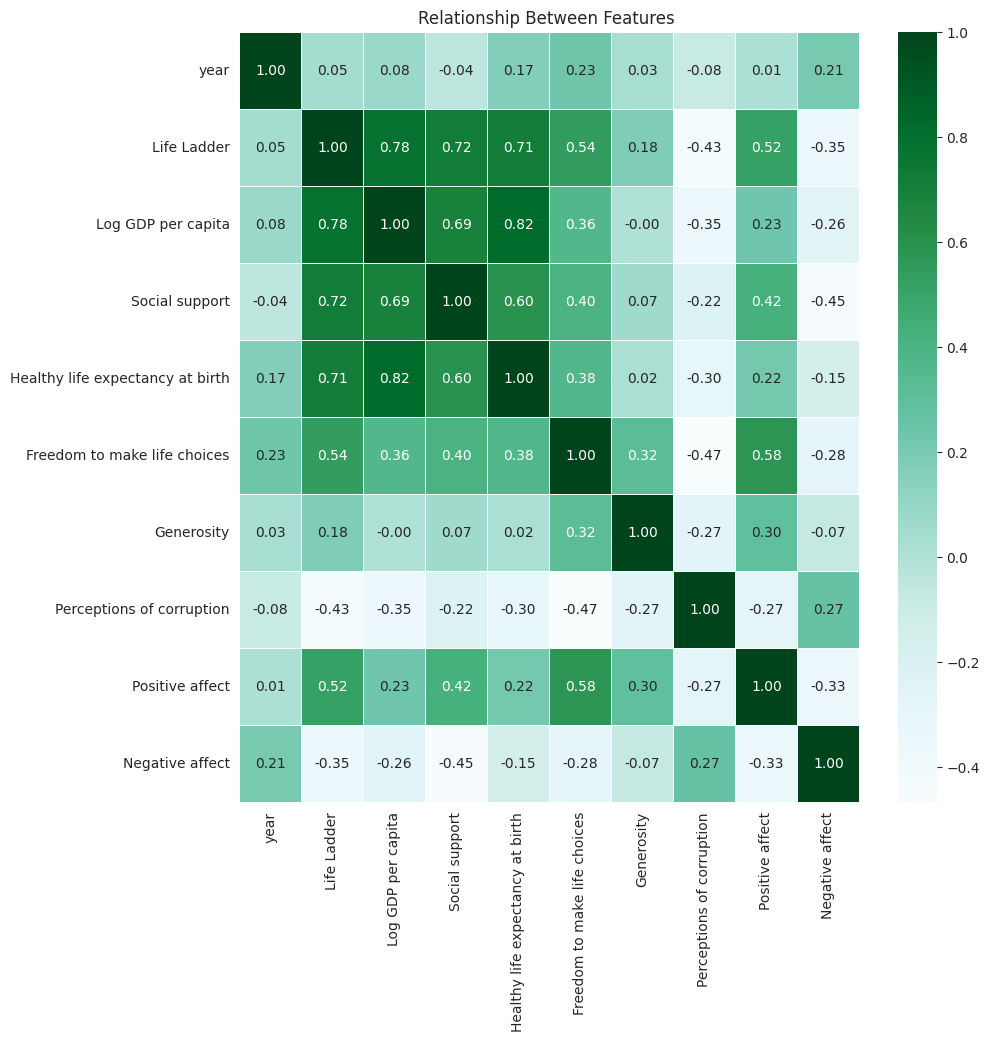

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(), annot = True, fmt = ".2f", linewidth = .5,cmap="BuGn")
plt.title("Relationship Between Features ")
plt.show()

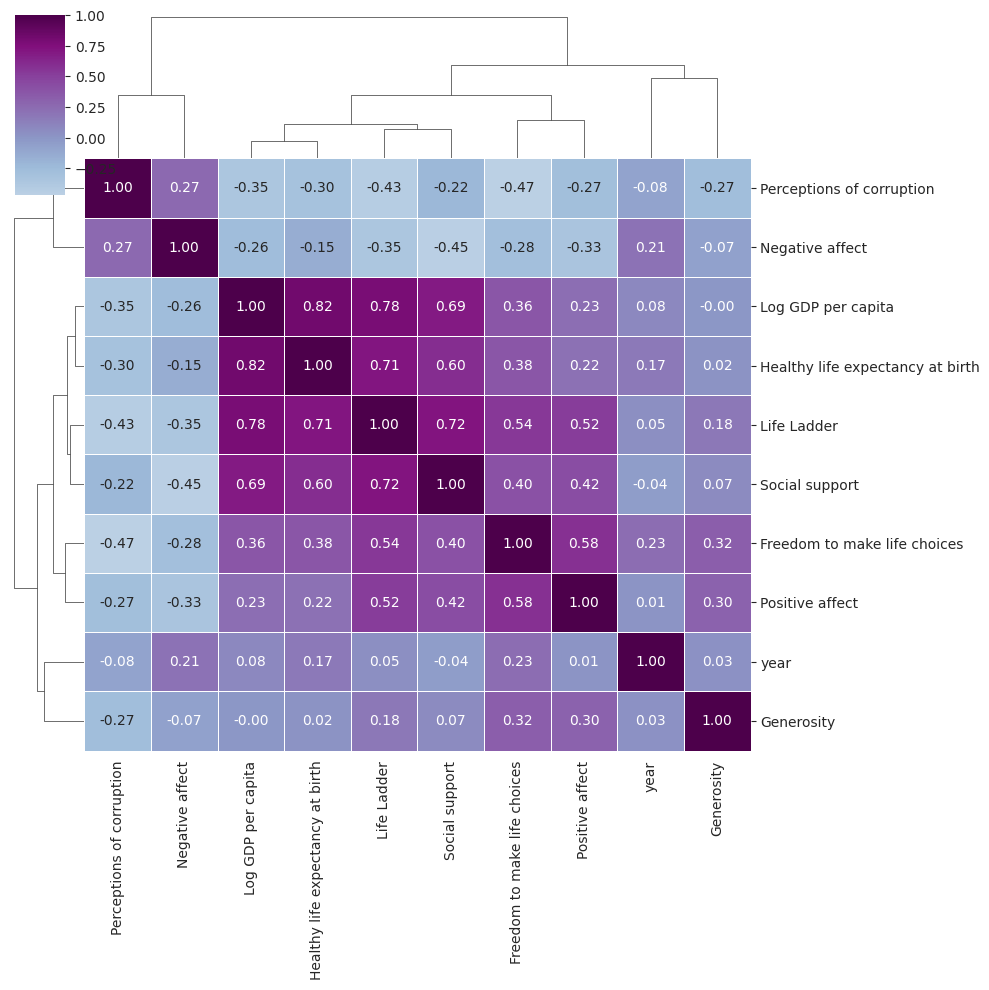

In [50]:
sns.clustermap(df2.corr(), center = 0, cmap = "BuPu", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .7, figsize=(10,10),fmt=".2f")
plt.show()